In [62]:
import nltk
from nltk.stem import WordNetLemmatizer

In [3]:
titles = [title.rstrip() for title in open('all_book_titles.txt')]

In [5]:
titles[:5]

['Philosophy of Sex and Love A Reader',
 'Readings in Judaism, Christianity, and Islam',
 'Microprocessors Principles and Applications',
 'Bernhard Edouard Fernow: Story of North American Forestry',
 'Encyclopedia of Buddhism']

In [93]:
stopwords = [word.rstrip() for word in open('stopwords.txt')]

In [94]:
stopwords[:5]

['a', 'about', 'above', 'across', 'after']

In [9]:
lemmatizer = WordNetLemmatizer()

def tokenizer(text):
    tokens = nltk.tokenize.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens] # 過濾文法變化
    tokens = [token for token in tokens if len(token) > 3 and token not in stopwords] # 過濾掉過短單字 & stopwords
    return tokens

In [55]:
word_idx_map = {}
curr_idx = 0
all_tokens = []
all_titles = []
idx_word_map = []
err_count = 0

for title in titles:
    try:
#         title = title.encode('ascii', 'ignore').decode('utf-8') # this will throw exception if bad characters
        all_titles.append(title)
        tokens = tokenizer(title)
        all_tokens.append(tokens)
        for token in tokens:
            if token not in word_idx_map:
                word_idx_map[token] = curr_idx
                curr_idx += 1
                idx_word_map.append(token)
    except Exception as e:
        print(e, title)
        err_count += 1

In [56]:
len(word_idx_map)

2097

In [57]:
import numpy as np

X = np.zeros((len(word_idx_map), len(all_tokens)))  
# row: 單字
# col: 文件
X.shape

(2097, 2373)

In [61]:
len(X[1])

2373

In [58]:
def tokens_to_vector(tokens):
    vector = np.zeros(len(word_idx_map))
    for token in tokens:
        idx = word_idx_map[token]
        vector[idx] = 1
    return vector

In [59]:
for idx, tokens in enumerate(all_tokens):
    X[:, idx] = tokens_to_vector(tokens)

In [64]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

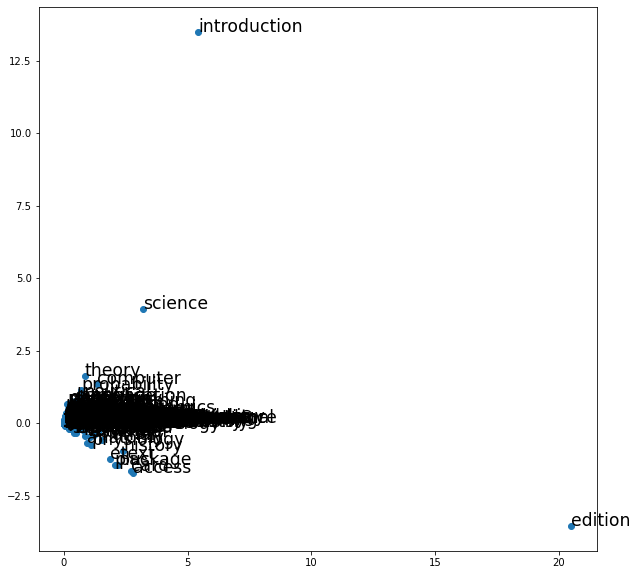

In [87]:
svd = TruncatedSVD()
Z = svd.fit_transform(X)
plt.figure(figsize=(10, 10))
plt.scatter(Z[:, 0], Z[:, 1])
for i in range(len(word_idx_map)):
    plt.text(x=Z[i, 0], y=Z[i, 1], s=idx_word_map[i], fontdict={'fontsize': 'xx-large'})
    
plt.show();

---
* 'introduction', 'edition' 等單字較無分類意義，可加入 stopwords
* 加入新的停用詞之後再試一次

In [102]:
stopwords = set(stopwords).union({
    'introduction', 'edition', 'series', 'application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
    'third', 'second', 'fourth', })

In [104]:
word_idx_map = {}
curr_idx = 0
all_tokens = []
all_titles = []
idx_word_map = []
err_count = 0

for title in titles:
    try:
#         title = title.encode('ascii', 'ignore').decode('utf-8') # this will throw exception if bad characters
        all_titles.append(title)
        tokens = tokenizer(title)
        all_tokens.append(tokens)
        for token in tokens:
            if token not in word_idx_map:
                word_idx_map[token] = curr_idx
                curr_idx += 1
                idx_word_map.append(token)
    except Exception as e:
        print(e, title)
        err_count += 1

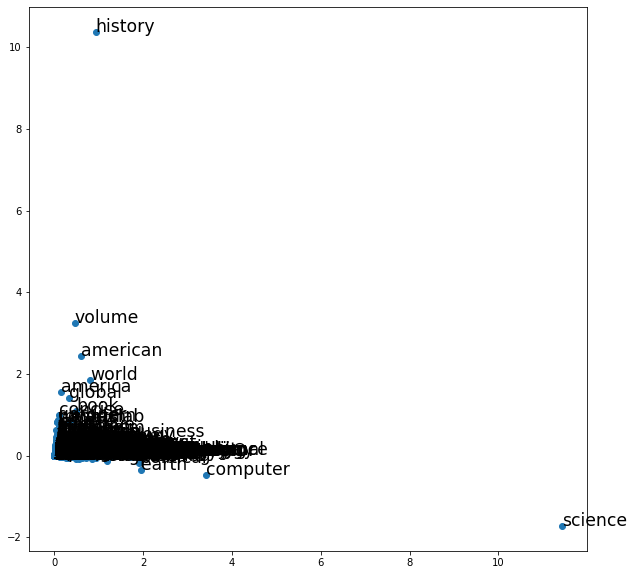

In [105]:
X = np.zeros((len(word_idx_map), len(all_tokens)))  
for idx, tokens in enumerate(all_tokens):
    X[:, idx] = tokens_to_vector(tokens)
svd = TruncatedSVD()
Z = svd.fit_transform(X)
plt.figure(figsize=(10, 10))
plt.scatter(Z[:, 0], Z[:, 1])
for i in range(len(word_idx_map)):
    plt.text(x=Z[i, 0], y=Z[i, 1], s=idx_word_map[i], fontdict={'fontsize': 'xx-large'})
    
plt.show();

---
## 延伸: 使用 TF-IDF

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer

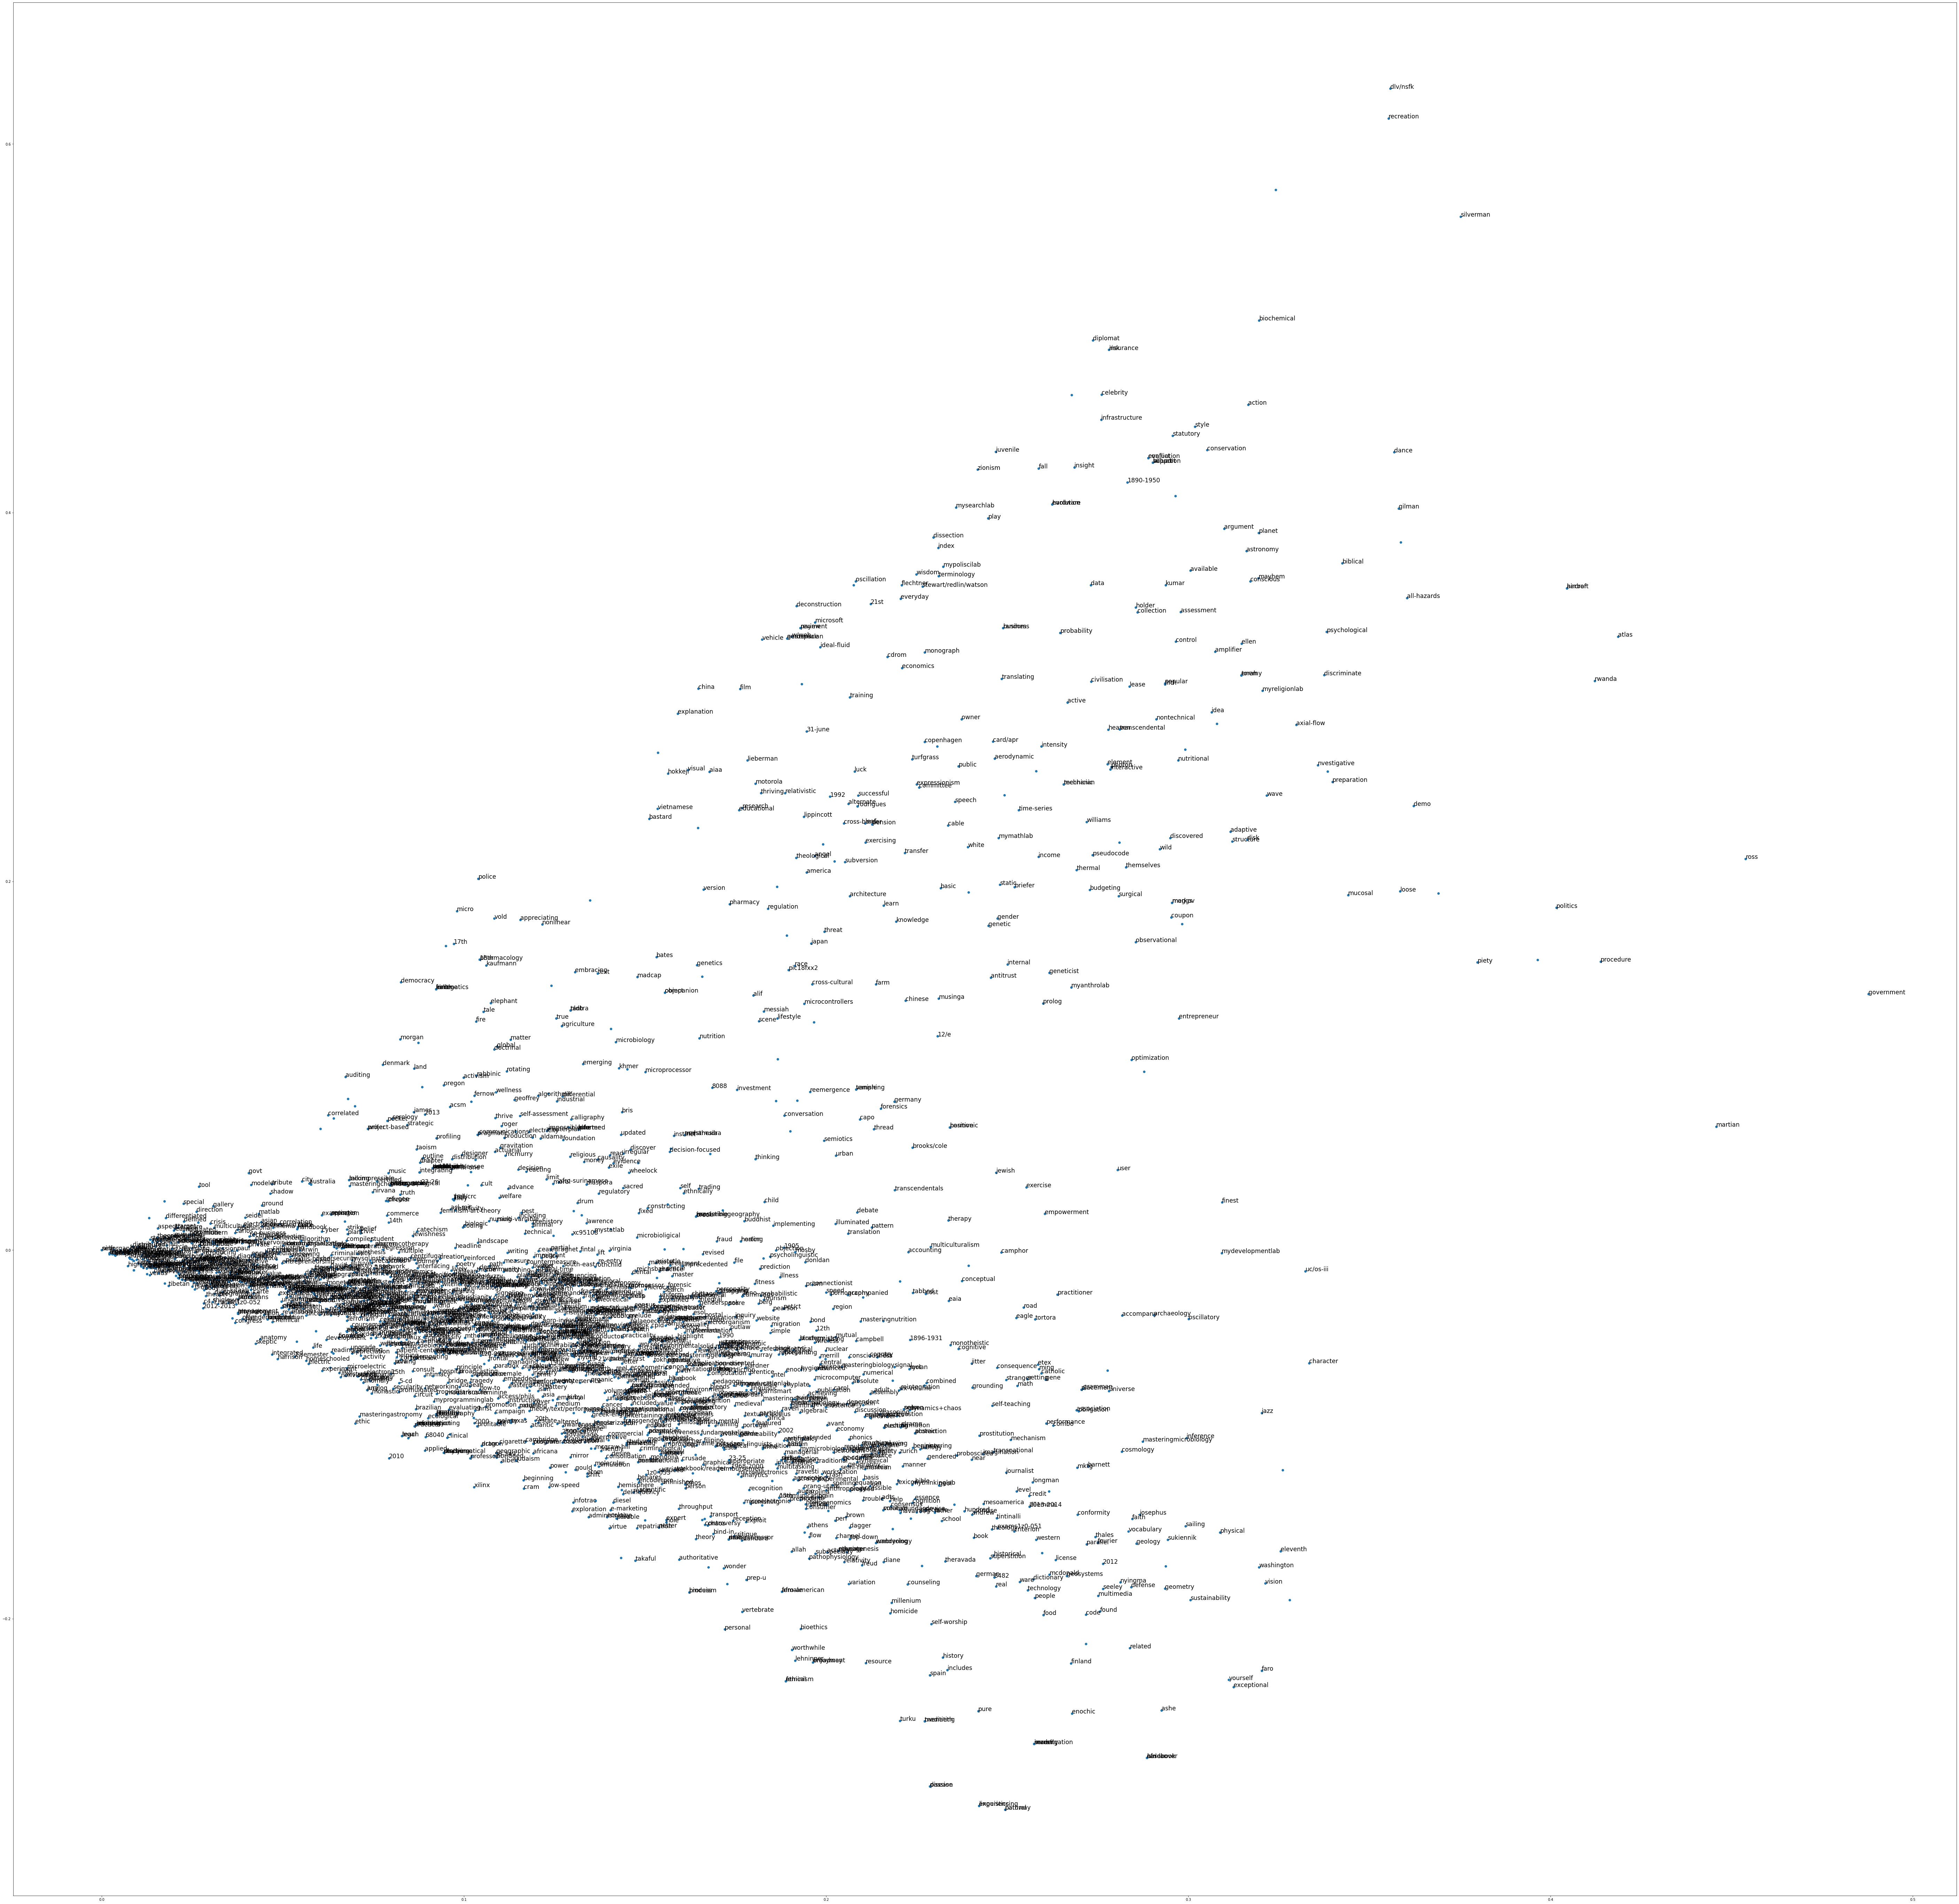

In [126]:
vectorizer = TfidfVectorizer()
Z = vectorizer.fit_transform(titles)
Z = svd.fit_transform(Z)
plt.figure(figsize=(100, 100))
plt.scatter(Z[:, 0], Z[:, 1])
for i in range(len(word_idx_map)):
    plt.text(x=Z[i, 0], y=Z[i, 1], s=idx_word_map[i], fontdict={'fontsize': 'xx-large'})
    
plt.show();